# $$ Assignment2 Machine Learning $$

## <span style="color:red">Initializing Packages and Importing Data</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
charm = pd.read_csv("C://Users/Aakash Sharma/Desktop/Machine_Learning/Assignment2_PGD B7/Assignment2_PGD B7/People Charm case.csv")

In [3]:
charm.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [4]:
numeric_var = charm.select_dtypes(include=[np.number])
numeric_var.dtypes

satisfactoryLevel        float64
lastEvaluation           float64
numberOfProjects           int64
avgMonthlyHours            int64
timeSpent.company          int64
workAccident               int64
left                       int64
promotionInLast5years      int64
dtype: object

## <span style="color:red">Get Inference from Pandas Profiling Report</span>

In [5]:
#For getting detailed report about the data - whether any missing value etc. 
import pandas_profiling as pd_prof
pd_prof.ProfileReport(charm)

In [6]:
charm.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


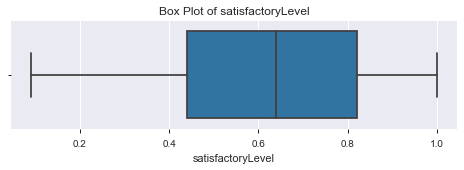

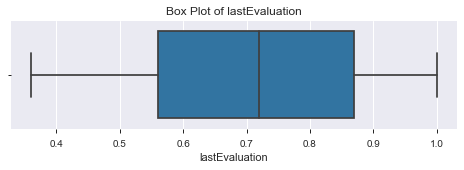

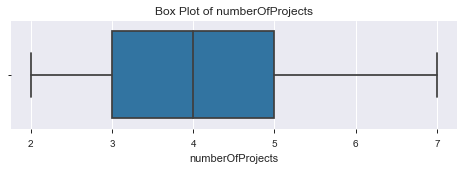

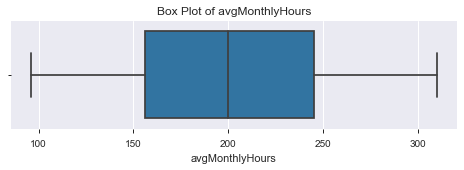

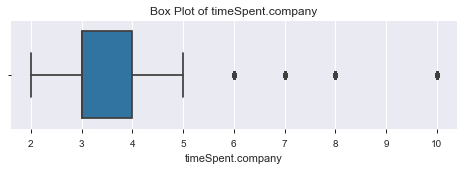

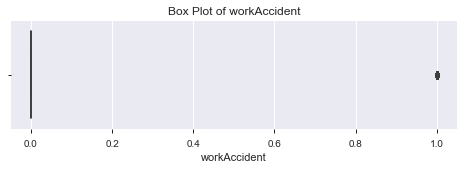

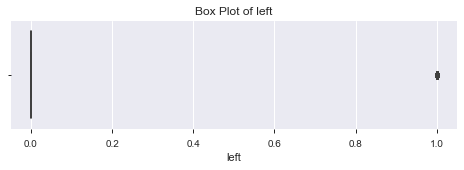

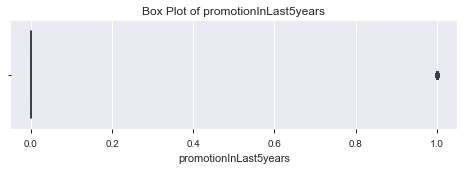

In [7]:
# We can check that the data have outliers or not.

for num_variable in numeric_var:
    fig,axes = plt.subplots(figsize=(8,2))
    sns.boxplot( x=num_variable, data = numeric_var)
    plt.title(str('Box Plot of ') + str(num_variable))
    #bp.savefig(fig)
#bp.close()


In [8]:
charm.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


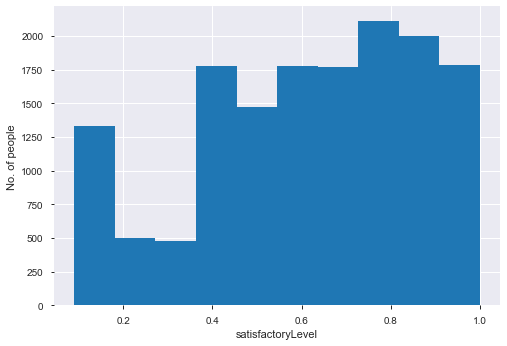

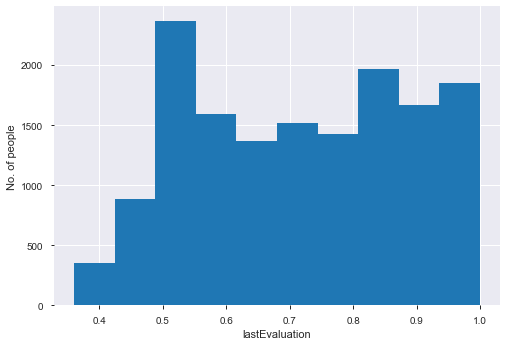

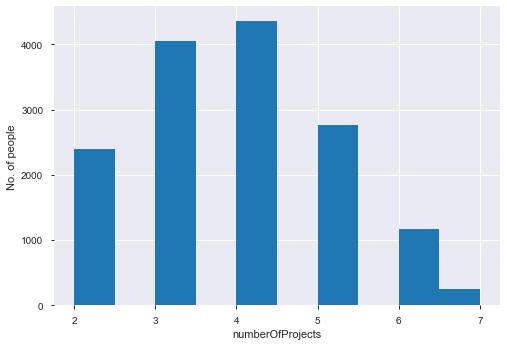

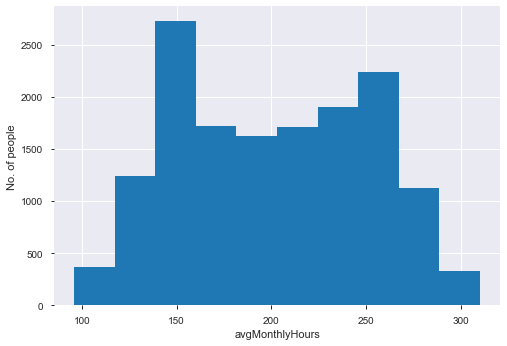

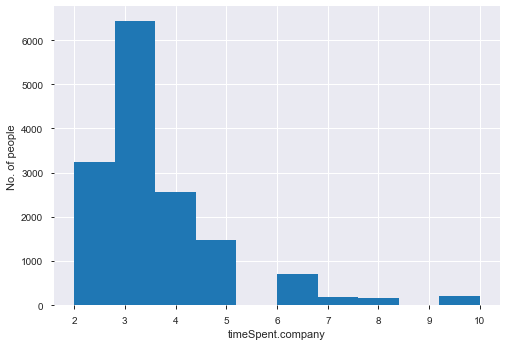

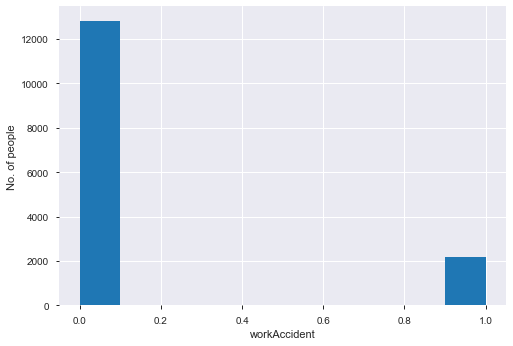

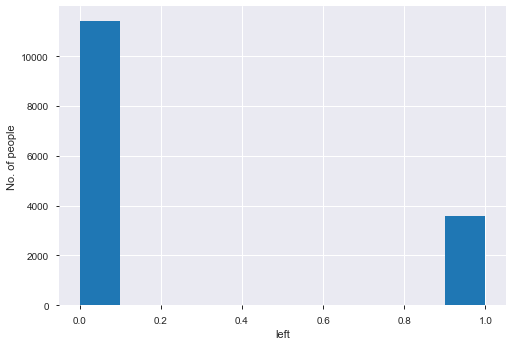

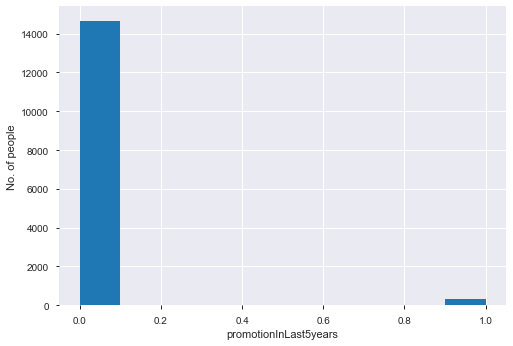

In [9]:
# We can check that the data is Normalise or not.

for num_variable in numeric_var:
    plt.hist(charm[num_variable])
    plt.xlabel(num_variable)
    plt.ylabel('No. of people')
    plt.show()

## <span style="color:red">Bivariate Distribution</span>

> ###  <b><i><span style="color:green">Satisfactory Level and Left Analysis</span>

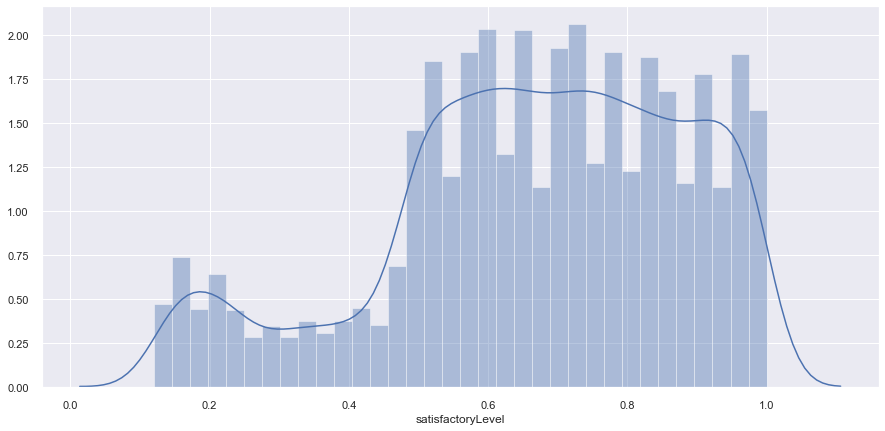

In [10]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
sns.distplot(charm[charm['left']==0]['satisfactoryLevel'])

#### <span style="color:blue">The Inferernce we get from the Distplot of Satisfactory level and Left Analysis is that there is a positive coorelation  between satisfactory level and employee left.</span>

> ###  <b><i><span style="color:green">lastEvaluation and Left Analysis</span>

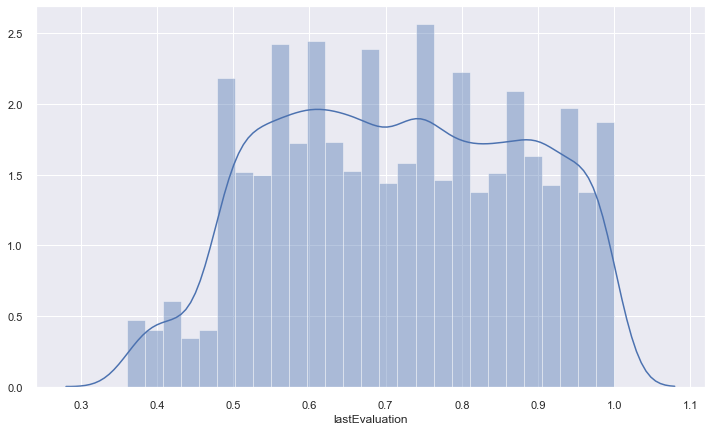

In [11]:
#sns.set(style="darkgrid")
plt.figure(figsize=(12,7))
sns.distplot(charm[charm['left']==0]['lastEvaluation'])

####  <span style="color:blue">The Inferernce we get from the Distplot of Last Evaluation and Left Analysis is that there is a positive coorelation  when the employees not left.</span>

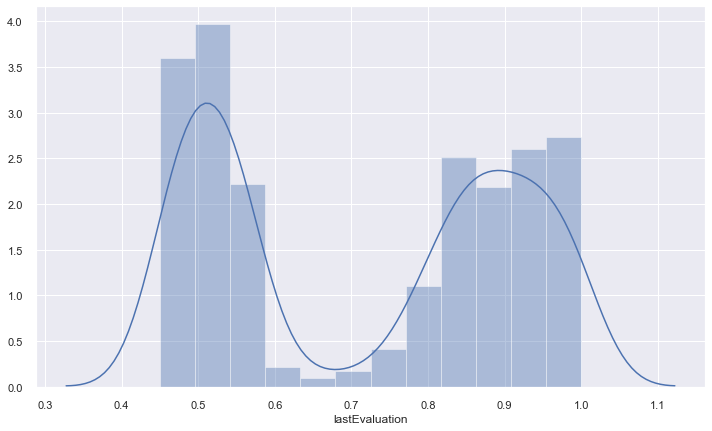

In [12]:
#sns.set(style="darkgrid")
plt.figure(figsize=(12,7))
sns.distplot(charm[charm['left']==1]['lastEvaluation'])

####  <span style="color:blue">The Inferernce we get from the Distplot of Last Evaluation and Left Analysis is that there is a positive coorelation  when the employees left.</span>

> ###  <b><i><span style="color:green">numberOfProjects and Left Analysis</span>

In [13]:
a = pd.DataFrame(charm.groupby(['numberOfProjects','left'])['left'].count())
a.columns = ['Count']
b = a.reset_index()
b

,numberOfProjects,left,Count
0,2,0,821
1,2,1,1567
2,3,0,3983
3,3,1,72
4,4,0,3956
5,4,1,409
6,5,0,2149
7,5,1,612
8,6,0,519
9,6,1,655


<Figure size 1080x504 with 0 Axes>

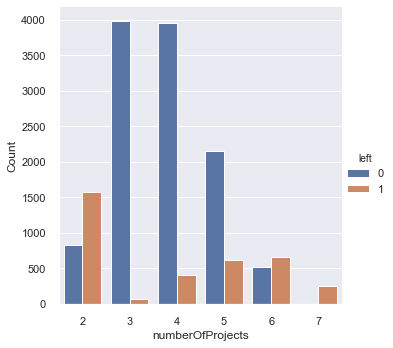

In [14]:
plt.figure(figsize=(15,7))
sns.catplot(x="numberOfProjects", y="Count", hue="left", kind="bar", data=b);


####  <span style="color:blue">The Inferernce we get from the bar graph of Number of project and Left Analysis is that there is no coorelation between NUmber of project and Left Analysis.</span>

> ###  <b><i><span style="color:green">avgMonthlyHours and Left Analysis</span>

In [15]:
charm[charm['avgMonthlyHours']>= charm['avgMonthlyHours'].mean()].groupby('left')['left'].count()


left
0    5474
1    1915
Name: left, dtype: int64

####  <span style="color:blue">The Inferernce we get from the Avg monthly hours and Left Analysis is that when the avg. monthly hours is greater there are 1915 employees were left the company.</span>

In [16]:
charm[charm['avgMonthlyHours']<= charm['avgMonthlyHours'].mean()].groupby('left')['left'].count()


left
0    5954
1    1656
Name: left, dtype: int64

####  <span style="color:blue">The Inferernce we get from the Avg monthly hours and Left Analysis is that when the avg. monthly hours is less there are 1656 employees were left the company.</span>

 > ###  <b><i><span style="color:green">Dept and Left Analysis</span>

In [17]:
a1 = pd.DataFrame(charm.groupby(['dept','left'])['left'].count())
a1.columns = ['Count']
b1 = a1.reset_index()
b1

,dept,left,Count
0,IT,0,954
1,IT,1,273
2,RandD,0,666
3,RandD,1,121
4,accounting,0,563
5,accounting,1,204
6,hr,0,524
7,hr,1,215
8,management,0,539
9,management,1,91


<Figure size 1080x720 with 0 Axes>

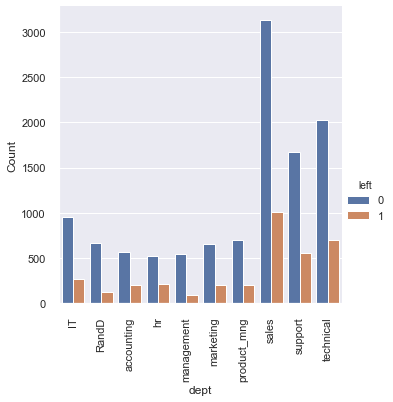

In [18]:
plt.figure(figsize=(15,10))
sns.catplot(x="dept", y="Count", hue="left", kind="bar", data=b1)
plt.xticks(rotation=90)
plt.show()

####  <span style="color:blue">The Inferernce we get from the department and Left Analysis is that sales department have highest left employees.</span>

 > ###  <b><i><span style="color:green">Salary and Left Analysis</span>

In [19]:
a2 = pd.DataFrame(charm.groupby(['salary','left'])['left'].count())
a2.columns = ['Count']
b2 = a2.reset_index()
b2

,salary,left,Count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129
5,medium,1,1317


<Figure size 1080x720 with 0 Axes>

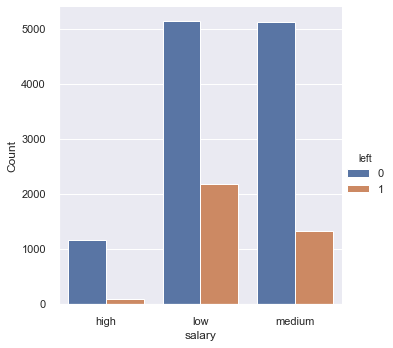

In [20]:
plt.figure(figsize=(15,10))
sns.catplot(x="salary", y="Count", hue="left", kind="bar", data=b2)
#plt.xticks(rotation=90)
#plt.show()

####  <span style="color:blue">The Inferernce we get from the salary and Left Analysis is that salary does not matter whether the employees left or not.</span>

## <span style="color:red">Data Pre-Processing</span>

 > ###  <b><i><span style="color:green">Drop Duplicate values in the dataframe</span>

In [21]:
charm.drop_duplicates(keep = 'first', inplace = True)      

In [22]:
charm.reset_index(drop=True)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11986,0.30,0.88,5,245,4,0,0,0,hr,low
11987,0.99,0.83,4,274,2,0,0,0,sales,low
11988,0.72,0.72,4,175,4,0,0,0,technical,low
11989,0.24,0.91,5,177,5,0,0,0,sales,low


 > ###  <b><i><span style="color:green">Encoding</span>

In [23]:
charm1 = pd.get_dummies(charm)

In [24]:
charm1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.41,0.50,2,153,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [25]:
# So the data has only one outliers but it is not impact to the attrition rate, so now we need to Normalise the data.

# The best Normalisation technique when there is no outiers in the data is Min-Max Scaler Normalisation.

from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
mmsc_charm = mmsc.fit_transform(charm1)
mmsc_charm = pd.DataFrame(mmsc_charm)
mmsc_charm.columns = charm1.columns
mmsc_charm.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.351648,0.218750,0.0,0.266355,0.125,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


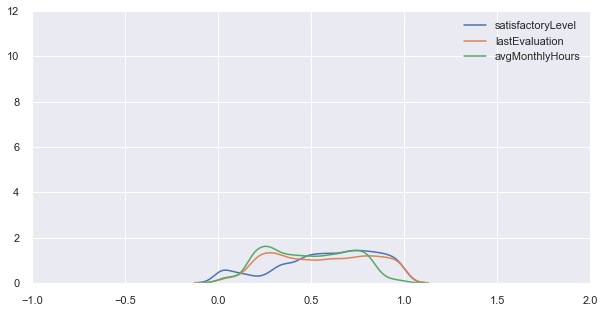

In [26]:
import seaborn as sb
plt.figure(figsize=(10,5))
plt.ylim(0,12)
plt.xlim(-1,2)
sb.kdeplot(mmsc_charm['satisfactoryLevel'])
sb.kdeplot(mmsc_charm['lastEvaluation'])
sb.kdeplot(mmsc_charm['avgMonthlyHours'])

## <span style="color:red">Applying Different Classification Algorithm</span>

 > ###  <b><i><span style="color:green">Using KNN Algorithm</span>

In [27]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [28]:
x = mmsc_charm.drop(['left'], axis=1) # Independent variable
y = mmsc_charm['left'] # Independent variable

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
print("KNN Scores= ", knn.score(x_test, y_test)*100)
prediction = knn.predict(x_test)

KNN Scores=  95.12296790329304


In [31]:
mis_class=[]
k_list = [i for i in range(1, 31)]
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    prediction = knn.predict(x_test)
    #cm = confusion_matrix(y_test, prediction)
    mis_class.append(sum(prediction!=y_test))
    #print("KNN Scores= ", knn.score(x_test, y_test)*100)

Text(0, 0.5, 'Mean Error')

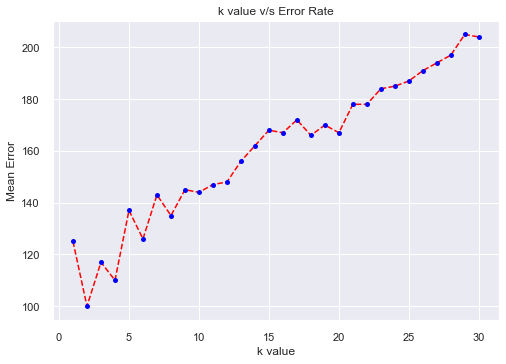

In [32]:
plt.plot(k_list, mis_class, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=5)
plt.title('k value v/s Error Rate')
plt.xlabel('k value')
plt.ylabel('Mean Error')


# this graph means there is an error if we take k value 1, 2,3,4 etc, so we tkae k value between 6 to 25 , so that we would get perfect model.

this graph means there is an error if we take k value 1, 2,3,4 etc, so we take k value 3 , so that we would get perfect model.

In [33]:
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix is: ", cm, sep='\n')

Confusion Matrix is: 
[[1943   64]
 [ 140  252]]


In [34]:
from sklearn import metrics
probs1 = knn.predict_proba(x_test)
prob_positive1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, prob_positive1)
roc_auc1 = metrics.auc(fpr1, tpr1)
print('Area under the curve: ', roc_auc1*100)

Area under the curve:  93.24812137111944


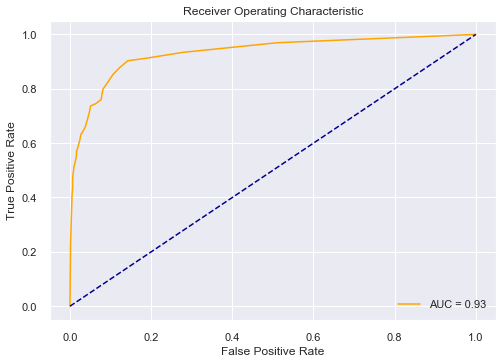

In [35]:
# plot ROC curve

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'orange', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# blue line shows the 0.5 , greate than this will good model , otherwise we have to make any other model using other algorithm.
# And blue line is threshold line is 0.5

> ###  <b><i><span style="color:green">Using Logistic Regression </span>

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred = reg.predict(x_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [39]:
# or the above predicted value internally it will shows that like this
probs2 = reg.predict_proba(x_test)
probs2

# the first column is class 0 and second column is class 1 , In first row , second column is favourable to class 1 and so on

array([[0.85905916, 0.14094084],
       [0.87851989, 0.12148011],
       [0.99157149, 0.00842851],
       ...,
       [0.87184972, 0.12815028],
       [0.94372147, 0.05627853],
       [0.83205605, 0.16794395]])

In [40]:
print("Scores= ", reg.score(x_test, y_test)*100)

Scores=  84.49353897457273


In [41]:
# create confusion matrix
cm1 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is: ", cm1, sep='\n')

Confusion Matrix is: 
[[1947   60]
 [ 312   80]]


In [42]:
from sklearn import metrics
prob_positive2 = probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, prob_positive2)
roc_auc2 = metrics.auc(fpr2, tpr2)
print('Area under the curve: ', roc_auc2*100)

Area under the curve:  84.32196495937687


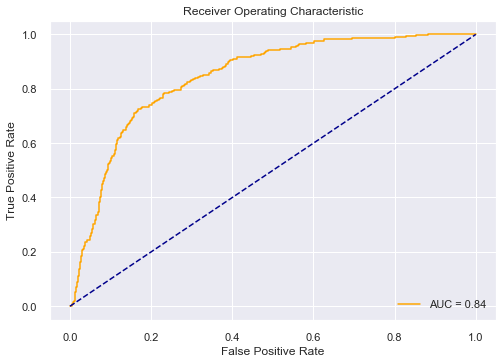

In [43]:
# plot ROC curve

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, 'orange', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# blue line shows the 0.5 , greate than this will good model , otherwise we have to make any other model using other algorithm.
# And blue line is threshold line is 0.5

> ###  <b><i><span style="color:green">Using Naive Bayes Algorithm </span>

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
gaussian = GaussianNB()
gaussian.fit(x_train,y_train)
print("Score = ", gaussian.score(x_test,y_test)*100)
y_predict = gaussian.predict(x_test)


Score =  75.53147144643602


In [46]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[1492,  515],
       [  72,  320]], dtype=int64)

In [47]:
from sklearn import metrics
probs3 = gaussian.predict_proba(x_test)
prob_positive3 = probs3[:,1]
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, prob_positive3)
roc_auc3 = metrics.auc(fpr3, tpr3)
print('Area under the curve: ', roc_auc3*100)

Area under the curve:  83.45751604079598


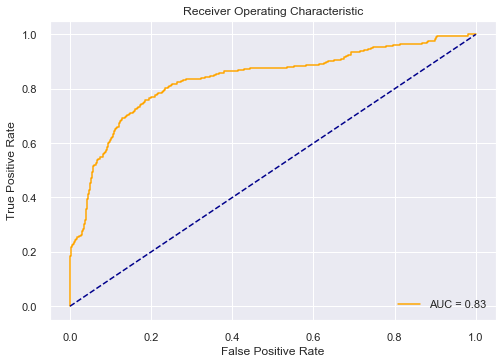

In [48]:
# plot ROC curve

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr3, tpr3, 'orange', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# blue line shows the 0.5 , greate than this will good model , otherwise we have to make any other model using other algorithm.
# And blue line is threshold line is 0.5

> ###  <b><i><span style="color:green">Using Decision Tree Algorithm </span>

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [50]:
# Default criteria is gini indicating ginin impurity
# Use 'entropy' if you want to use information gain for the split

clf = DecisionTreeClassifier()  #(criterion = "entropy")
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
y_pred = clf.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [52]:
y_test

9127     0.0
4827     0.0
11032    0.0
9467     0.0
3719     0.0
        ... 
11332    0.0
843      1.0
6805     0.0
7448     0.0
9795     0.0
Name: left, Length: 2399, dtype: float64

In [53]:
# create confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is: ", cm4, sep='\n')

Confusion Matrix is: 
[[1952   55]
 [  31  361]]


In [54]:
from sklearn import metrics
print("Scores= ", metrics.accuracy_score(y_pred, y_test)*100)

Scores=  96.41517298874531


In [55]:
from sklearn import metrics
probs4 = clf.predict_proba(x_test)
prob_positive4 = probs4[:,1]
fpr4, tpr4, threshold4 = metrics.roc_curve(y_test, prob_positive4)
roc_auc4 = metrics.auc(fpr4, tpr4)
print('Area under the curve: ', roc_auc4*100)

Area under the curve:  94.67571408234446


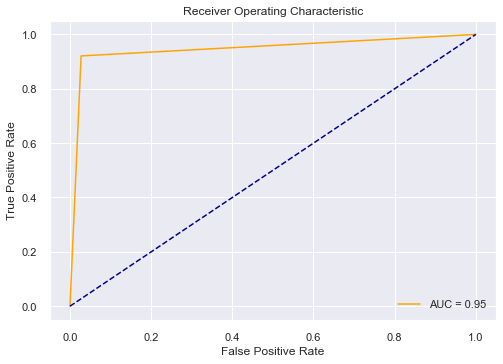

In [56]:
# plot ROC curve

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr4, tpr4, 'orange', label = 'AUC = %0.2f' % roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# blue line shows the 0.5 , greate than this will good model , otherwise we have to make any other model using other algorithm.
# And blue line is threshold line is 0.5

> ###  <b><i><span style="color:green">Using Random Foresst Algorithm </span>

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [58]:
randforest=[]
for i in range(1,201):
    rf = RandomForestClassifier(n_estimators= i)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    a = accuracy_score(y_test, y_pred)*100
    randforest.append(a)
print('Accuracy score of Random Forest Classifier is: ', max(randforest))

Accuracy score of Random Forest Classifier is:  98.37432263443101


In [59]:
# create confusion matrix
cm5 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is: ", cm5, sep='\n')

Confusion Matrix is: 
[[2000    7]
 [  33  359]]


In [60]:
from sklearn import metrics
probs5 = rf.predict_proba(x_test)
prob_positive5 = probs5[:,1]
fpr5, tpr5, threshold5 = metrics.roc_curve(y_test, prob_positive5)
roc_auc5 = metrics.auc(fpr5, tpr5)
print('Area under the curve: ', roc_auc5*100)

Area under the curve:  97.80754603784713


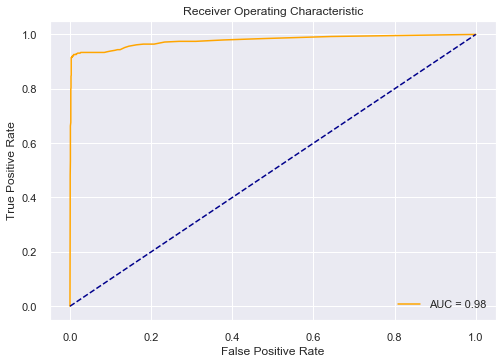

In [61]:
# plot ROC curve

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr5, tpr5, 'orange', label = 'AUC = %0.2f' % roc_auc5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# blue line shows the 0.5 , greate than this will good model , otherwise we have to make any other model using other algorithm.
# And blue line is threshold line is 0.5

> ###  <b><i><span style="color:green">Using Adaboost Algorithm </span>

In [62]:
adaboost=[]
for i in range(1,201):
    ab = AdaBoostClassifier(n_estimators= i)
    ab.fit(x_train, y_train)
    y_pred = ab.predict(x_test)
    a = accuracy_score(y_test, y_pred)*100
    adaboost.append(a)
print('Accuracy score of Adaboost Classifier is: ', max(adaboost))

Accuracy score of Adaboost Classifier is:  96.7903293038766


In [63]:
# create confusion matrix
cm6 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is: ", cm6, sep='\n')

Confusion Matrix is: 
[[1960   47]
 [  40  352]]


In [64]:
from sklearn import metrics
probs6 = rf.predict_proba(x_test)
prob_positive6 = probs6[:,1]
fpr6, tpr6, threshold6 = metrics.roc_curve(y_test, prob_positive6)
roc_auc6 = metrics.auc(fpr6, tpr6)
print('Area under the curve: ', roc_auc6*100)

Area under the curve:  97.80754603784713


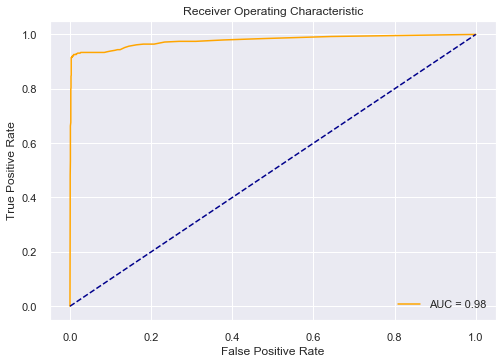

In [65]:
# plot ROC curve

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr6, tpr6, 'orange', label = 'AUC = %0.2f' % roc_auc6)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# blue line shows the 0.5 , greate than this will good model , otherwise we have to make any other model using other algorithm.
# And blue line is threshold line is 0.5

> ###  <b><i><span style="color:green">Using GridentBoost Algorithm </span>

In [66]:
gradient=[]
for i in range(1,201):
    gb = GradientBoostingClassifier(n_estimators= i)
    gb.fit(x_train, y_train)
    y_pred = gb.predict(x_test)
    a = accuracy_score(y_test, y_pred)*100
    gradient.append(a)
print('Accuracy score of Adaboost Classifier is: ', max(gradient))

Accuracy score of Adaboost Classifier is:  98.20758649437266


In [67]:
# create confusion matrix
cm7 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is: ", cm7, sep='\n')

Confusion Matrix is: 
[[1988   19]
 [  28  364]]


In [68]:
from sklearn import metrics
probs7 = gb.predict_proba(x_test)
prob_positive7 = probs7[:,1]
fpr7, tpr7, threshold7 = metrics.roc_curve(y_test, prob_positive7)
roc_auc7 = metrics.auc(fpr7, tpr7)
print('Area under the curve: ', roc_auc7*100)

Area under the curve:  98.61028492114335


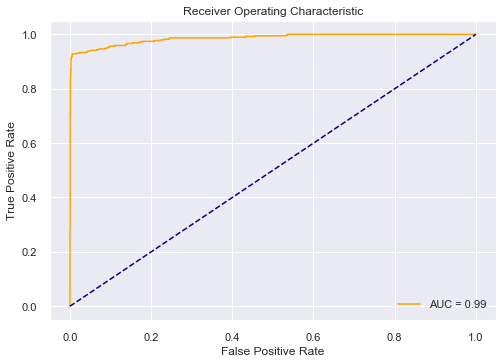

In [69]:
# plot ROC curve

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr7, tpr7, 'orange', label = 'AUC = %0.2f' % roc_auc7)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# blue line shows the 0.5 , greate than this will good model , otherwise we have to make any other model using other algorithm.
# And blue line is threshold line is 0.5

> ###  <b><i><span style="color:green">Using Xgboost Algorithm </span>

In [70]:
from xgboost import XGBClassifier
xb = XGBClassifier()
xb.fit(x_train, y_train)
y_pred = xb.predict(x_test)
xg = accuracy_score(y_test, y_pred)*100
print('score =',xg)

score = 98.0408503543143


In [71]:
# create confusion matrix
cm8 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is: ", cm8, sep='\n')

Confusion Matrix is: 
[[1991   16]
 [  31  361]]


In [72]:
from sklearn import metrics
probs8 = gb.predict_proba(x_test)
prob_positive8 = probs8[:,1]
fpr8, tpr8, threshold8 = metrics.roc_curve(y_test, prob_positive8)
roc_auc8 = metrics.auc(fpr8, tpr8)
print('Area under the curve: ', roc_auc8*100)

Area under the curve:  98.61028492114335


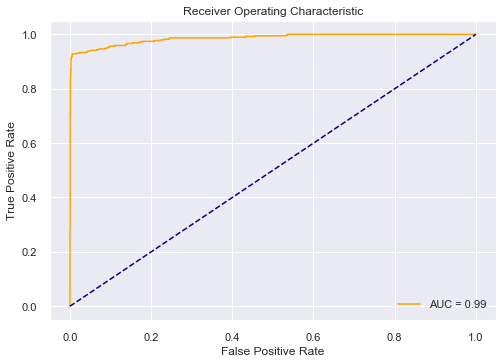

In [73]:
# plot ROC curve

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr8, tpr8, 'orange', label = 'AUC = %0.2f' % roc_auc8)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# blue line shows the 0.5 , greate than this will good model , otherwise we have to make any other model using other algorithm.
# And blue line is threshold line is 0.5

> ###  <b><i><span style="color:green">Do you feel accuracy is a good performance evaluation metric for the given data? If yes, justify your answer. If no, justify your answer and suggest alternative metric/s. </span>

In [74]:
KNN_cls_accuracy = knn.score(x_test, y_test)*100
Logistic_regression_accuracy = reg.score(x_test, y_test)*100
Gaussian_navie_bayes_accuracy = gaussian.score(x_test,y_test)*100
Decision_tree_accuracy = metrics.accuracy_score(y_pred, y_test)*100
random_forrest_accuracy = max(randforest)
XGBoost_accuracy = xg
adaboost_accuracy = max(adaboost)
gradientboost_accuracy = max(gradient)

In [75]:
df = pd.DataFrame([KNN_cls_accuracy,Logistic_regression_accuracy,Gaussian_navie_bayes_accuracy,Decision_tree_accuracy,random_forrest_accuracy,XGBoost_accuracy,adaboost_accuracy,gradientboost_accuracy],index = ['KNN_cls_accuracy','Logistic_regression_accuracy','Gaussian_navie_bayes_accuracy','Decision_tree_accuracy','Random_Forrest_accuracy','XGBoost_accuracy','AdaBoost_accuracy','GradientBoost_accuracy']).reset_index()
df.columns = ['Classification_models','Accuracy_scores']
df.sort_values(by='Accuracy_scores',ascending =False)

,Classification_models,Accuracy_scores
4,Random_Forrest_accuracy,98.374323
7,GradientBoost_accuracy,98.207586
3,Decision_tree_accuracy,98.040850
5,XGBoost_accuracy,98.040850
6,AdaBoost_accuracy,96.790329
0,KNN_cls_accuracy,91.496457
1,Logistic_regression_accuracy,84.493539
2,Gaussian_navie_bayes_accuracy,75.531471


###  Best Model

From the above table it is clearly visible that out of all the Classifier models, KNN_cls model yeilds the best accuracy (91.49%) Why am I choosing KNN_cls model as best model ?

As we know that, A Random_Forrest_accuracy yielding maximum accuracy (i.e, over 95% ) will lead to overfitting of data

The KNN_cls gives 91.49 % which is reasonable comparatively better than Logistic_regression_accuracy and Gaussian_navie_bayes_accuracy and not overfitted like other remaining classifiers yeilding more than 95% accuracy. 
#### Do you feel accuracy is a good performance evaluation metric for the given data? If yes, justify your answer. If no, justify your answer and suggest alternative metric/s Accuracy is not a good performance evaluation metric for the given dataset ( 'NO' ) for Logistic Regression, KNN classification and Gaussian Navie Bayes.

Accuracy is may or may not a good performance evaluation metric for the given dataset, because sometimes , the overall accuracy (say Logistic Regression and gaussian navie bayes classification) of binary classification may lead to false prediction(falsely accurate)

Eg : let us assume the Gmail Spam Classification.

- Take the case of classifying email as spam (the positive class) or not spam (the negative class). 99% of the time, the email you receive is not spam, but perhaps 1% of the time it is spam. If we were to train a machine learning model and it learned to always predict an email as not spam (negative class), then it would be accurate 99% of the time despite never catching the positive class.

  - -> In the above example there are two classes , not spam and spam
  - -> if the Any one of the false postive or false negative value is more than true positive or true negative
            -> Overall accuracy may be higher(say 99%),
            -> But the accuracy of the model may be falsely accurate and this may demerit the developed model 
            and its prediction
            -> so , it is suggested to go for other performance measures for binary classification to get
            better results. The other performance measures are: 
                - Recall
                - Precision
                - F-score
                - Specificity 
                
###  <b><i><span style="color:green">CONCLUSION</span>

Accuracy is not a good performance evaluation metric for the given dataset and it depends on what classification model we are developing.

# $$Project Report End$$